In [1]:
# Load the textbook R package
require(ISLR)
# Load in the credit data
attach(Default)

Loading required package: ISLR



In [2]:
# Lets take a look at the data
str(Default)

'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


In [3]:
# How many people actual default?
tmp <- table(default)
(tmp[[2]]/tmp[[1]])*100

[1] 3.444709

In [4]:
library(ggplot2); library(gridExtra)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


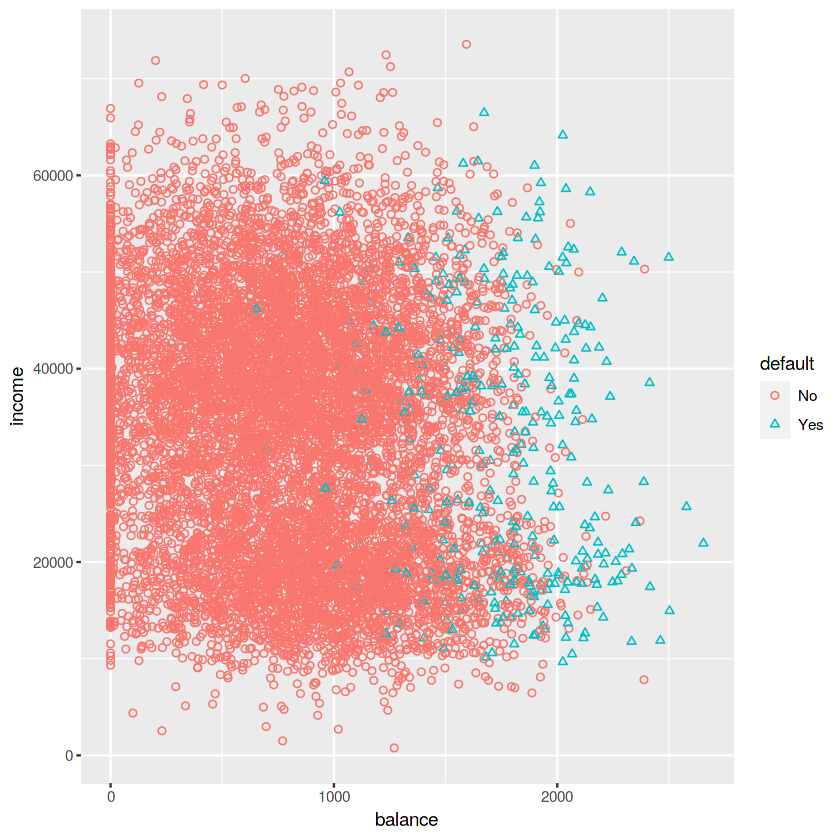

In [5]:
## Loading required package: grid
x <- qplot(x=balance, y=income, color=default, shape=default, geom='point')+scale_shape(solid=FALSE)
y <- qplot(x=default, y=balance, fill=default, geom='boxplot')+guides(fill=FALSE)
z <- qplot(x=default, y=income, fill=default, geom='boxplot')+guides(fill=FALSE)
# Plot
x

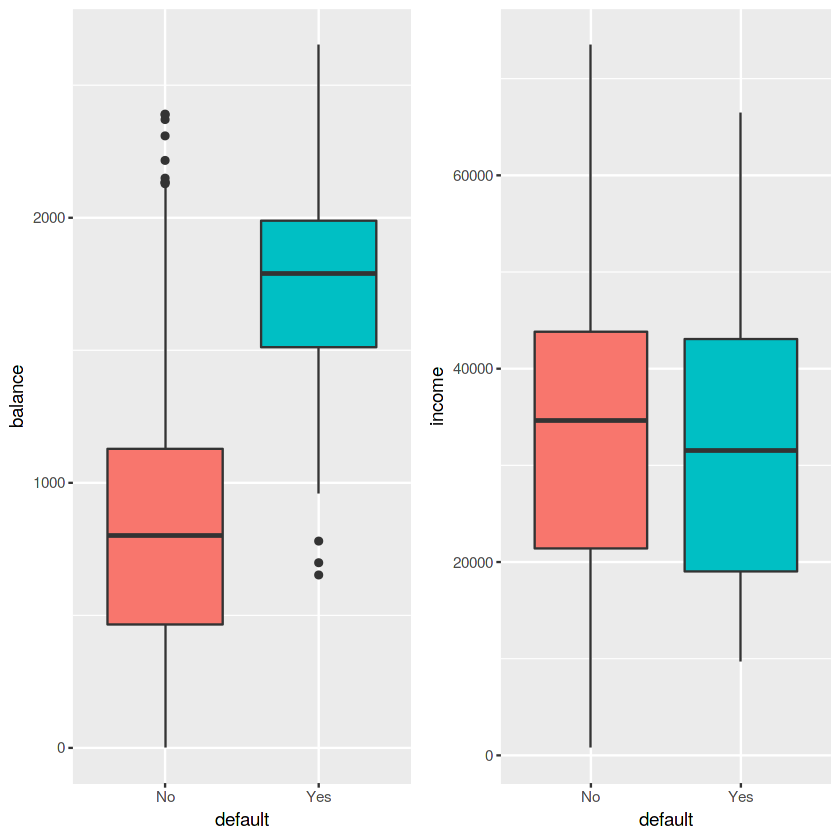

In [6]:
grid.arrange(y, z, nrow=1)

In [7]:
logit <- glm(default ~ balance, data=Default, family='binomial')
summary(logit)


Call:
glm(formula = default ~ balance, family = "binomial", data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2697  -0.1465  -0.0589  -0.0221   3.7589  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.065e+01  3.612e-01  -29.49   <2e-16 ***
balance      5.499e-03  2.204e-04   24.95   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1596.5  on 9998  degrees of freedom
AIC: 1600.5

Number of Fisher Scoring iterations: 8


In [8]:
# Create a new dummy variable for students
Default$studentD <- 0
Default$studentD[Default$student=="Yes"] <- 1

logit <- glm(default ~ studentD, data=Default, family='binomial')
summary(logit)


Call:
glm(formula = default ~ studentD, family = "binomial", data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.2970  -0.2970  -0.2434  -0.2434   2.6585  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.50413    0.07071  -49.55  < 2e-16 ***
studentD     0.40489    0.11502    3.52 0.000431 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 2908.7  on 9998  degrees of freedom
AIC: 2912.7

Number of Fisher Scoring iterations: 6


In [9]:
logit <- glm(default ~ income + balance + studentD, family='binomial', data=Default)
summary(logit)


Call:
glm(formula = default ~ income + balance + studentD, family = "binomial", 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4691  -0.1418  -0.0557  -0.0203   3.7383  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.087e+01  4.923e-01 -22.080  < 2e-16 ***
income       3.033e-06  8.203e-06   0.370  0.71152    
balance      5.737e-03  2.319e-04  24.738  < 2e-16 ***
studentD    -6.468e-01  2.363e-01  -2.738  0.00619 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1571.5  on 9996  degrees of freedom
AIC: 1579.5

Number of Fisher Scoring iterations: 8


In [10]:
library(ISLR)
str(Smarket)

'data.frame':	1250 obs. of  9 variables:
 $ Year     : num  2001 2001 2001 2001 2001 ...
 $ Lag1     : num  0.381 0.959 1.032 -0.623 0.614 ...
 $ Lag2     : num  -0.192 0.381 0.959 1.032 -0.623 ...
 $ Lag3     : num  -2.624 -0.192 0.381 0.959 1.032 ...
 $ Lag4     : num  -1.055 -2.624 -0.192 0.381 0.959 ...
 $ Lag5     : num  5.01 -1.055 -2.624 -0.192 0.381 ...
 $ Volume   : num  1.19 1.3 1.41 1.28 1.21 ...
 $ Today    : num  0.959 1.032 -0.623 0.614 0.213 ...
 $ Direction: Factor w/ 2 levels "Down","Up": 2 2 1 2 2 2 1 2 2 2 ...


In [11]:
# Correlation minus the Direction variable
cor(Smarket[,-9])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,0.029699649,0.030596422,0.033194581,0.035688718,0.029787995,0.53900647,0.030095229
Lag1,0.02969965,1.000000000,-0.026294328,-0.010803402,-0.002985911,-0.005674606,0.04090991,-0.026155045
Lag2,0.03059642,-0.026294328,1.000000000,-0.025896670,-0.010853533,-0.003557949,-0.04338321,-0.010250033
Lag3,0.03319458,-0.010803402,-0.025896670,1.000000000,-0.024051036,-0.018808338,-0.04182369,-0.002447647
Lag4,0.03568872,-0.002985911,-0.010853533,-0.024051036,1.000000000,-0.027083641,-0.04841425,-0.006899527
Lag5,0.02978799,-0.005674606,-0.003557949,-0.018808338,-0.027083641,1.000000000,-0.02200231,-0.034860083
Volume,0.53900647,0.040909908,-0.043383215,-0.041823686,-0.048414246,-0.022002315,1.00000000,0.014591823
Today,0.03009523,-0.026155045,-0.010250033,-0.002447647,-0.006899527,-0.034860083,0.01459182,1.000000000


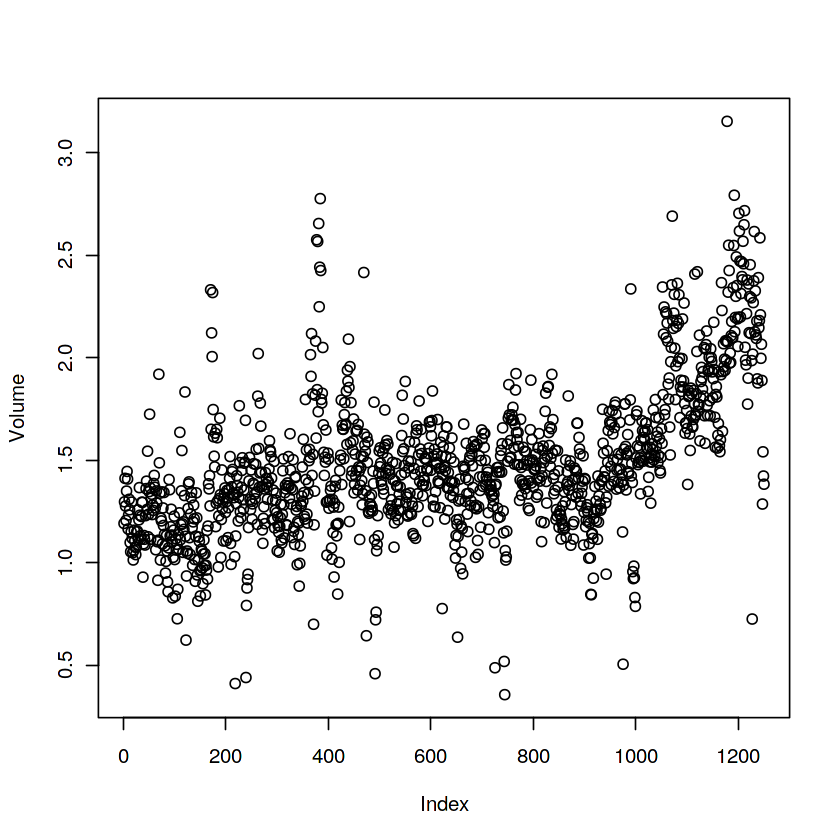

In [12]:
attach(Smarket)
plot(Volume)

In [13]:
# Split data into testing and training
train<-Smarket[Year<2005,]
test<-Smarket[Year==2005,]

In [14]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress




In [15]:
logit <- glm(Direction ~ Lag1+Lag2+Lag3, family='binomial', data=train)
summary(logit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3, family = "binomial", 
    data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.338  -1.189   1.072   1.163   1.335  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.032230   0.063377   0.509    0.611
Lag1        -0.055523   0.051709  -1.074    0.283
Lag2        -0.044300   0.051674  -0.857    0.391
Lag3         0.008815   0.051495   0.171    0.864

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 994  degrees of freedom
AIC: 1389.4

Number of Fisher Scoring iterations: 3


In [16]:
# Run the model on the test set
test.probs <-predict(logit, test, type='response')
pred.logit <- rep('Down',length(test.probs))
pred.logit[test.probs>=0.5] <- 'Up'

table(pred.logit, test$Direction)

          
pred.logit Down  Up
      Down   39  31
      Up     72 110

In [17]:
modelFit<- train(Direction~Lag1+Lag2+Lag3, method='glm',preProcess=c('scale', 'center'), data=train, family=binomial(link='logit'))

summary(modelFit)


Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.338  -1.189   1.072   1.163   1.335  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)
(Intercept)  0.03213    0.06338   0.507    0.612
Lag1        -0.06827    0.06358  -1.074    0.283
Lag2        -0.05447    0.06354  -0.857    0.391
Lag3         0.01086    0.06347   0.171    0.864

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1383.3  on 997  degrees of freedom
Residual deviance: 1381.4  on 994  degrees of freedom
AIC: 1389.4

Number of Fisher Scoring iterations: 3


In [18]:
cm=confusionMatrix(test$Direction, predict(modelFit, test))
cm

Confusion Matrix and Statistics

          Reference
Prediction Down  Up
      Down   39  72
      Up     31 110
                                          
               Accuracy : 0.5913          
                 95% CI : (0.5278, 0.6526)
    No Information Rate : 0.7222          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1369          
                                          
 Mcnemar's Test P-Value : 8.104e-05       
                                          
            Sensitivity : 0.5571          
            Specificity : 0.6044          
         Pos Pred Value : 0.3514          
         Neg Pred Value : 0.7801          
             Prevalence : 0.2778          
         Detection Rate : 0.1548          
   Detection Prevalence : 0.4405          
      Balanced Accuracy : 0.5808          
                                          
       'Positive' Class : Down            
                           

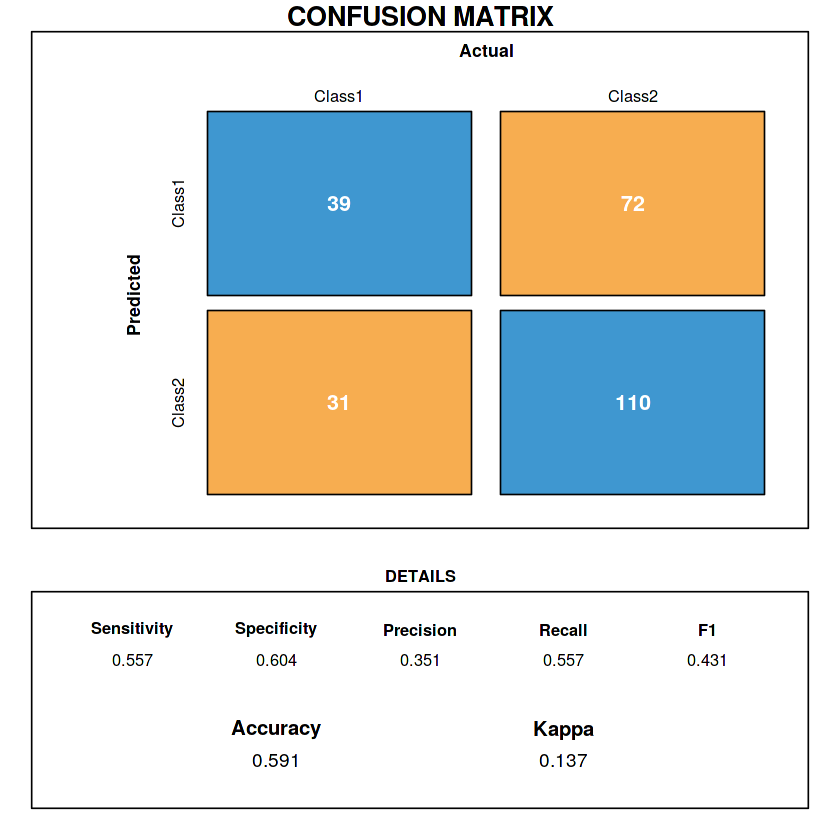

In [19]:

draw_confusion_matrix <- function(cm) {
  
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)
  
  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)
  
  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')
  
  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)
  
  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}  

draw_confusion_matrix(cm)